In [ ]:
from tensorflow.keras.datasets import mnist

2025-07-09 07:58:43.683991: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-09 07:58:43.691580: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-09 07:58:43.747484: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-09 07:58:43.795906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752065923.840896    7344 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752065923.85

In [13]:
print(f"x_train shape : {x_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"x_test shape  : {x_test.shape}")
print(f"y_test shape  : {y_test.shape}")

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape  : (10000, 28, 28)
y_test shape  : (10000,)


In [ ]:
print("label for first training example: ", y_train[0])
print("---beginning of pattern for first training example---")
for line in x_train[0]:
    for num in line:
        if num > 0:
            print("*", end=" ")
        else:
            print(" ", end=" ")
    print("")
print("---end of pattern for first training example")

label for first training example:  5
---beginning of pattern for first training example---
                                                        
                                                        
                                                        
                                                        
                                                        
                        * * * * * * * * * * * *         
                * * * * * * * * * * * * * * * *         
              * * * * * * * * * * * * * * * *           
              * * * * * * * * * * *                     
                * * * * * * *   * *                     
                  * * * * *                             
                      * * * *                           
                      * * * *                           
                        * * * * * *                     
                          * * * * * *                   
                            * * * * * *               

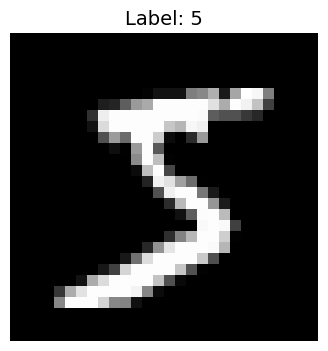

In [ ]:
import matplotlib.pyplot as plt

image = x_train[0]
label = y_train[0]

plt.figure(figsize=(4, 4))
plt.imshow(image, cmap="gray")
plt.title(f"Label: {label}", fontsize=14)
plt.axis("off")
plt.show()

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [6]:
x_train.shape

(60000, 28, 28)

In [ ]:
import numpy as np

(60000, 784)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#import idx2numpy

np.random.seed(7)

LEARNING_RATE = 0.01
EPOCHS = 20


def read_minist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    train_labels = np.unique(y_train)
    test_labels = np.unique(y_test)
    x_train = x_train.reshape(60000, 784)
    mean = np.mean(x_train)
    stddev = np.std(x_train)
    x_train = (x_train - mean) / stddev
    x_test = x_test.reshape(10000, 784)
    x_test = (x_test - mean) / stddev
    y_train = np.zeros((60000, 10))
    y_test = np.zeros((10000, 10))
    for i, y in enumerate(train_labels):
        y_train[i][y] = 1
    for i, y in enumerate(test_labels):
        y_test[i][y] = 1
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = read_minist()

index_list = list(range(len(x_train)))

In [12]:
x_train.shape

(60000, 784)